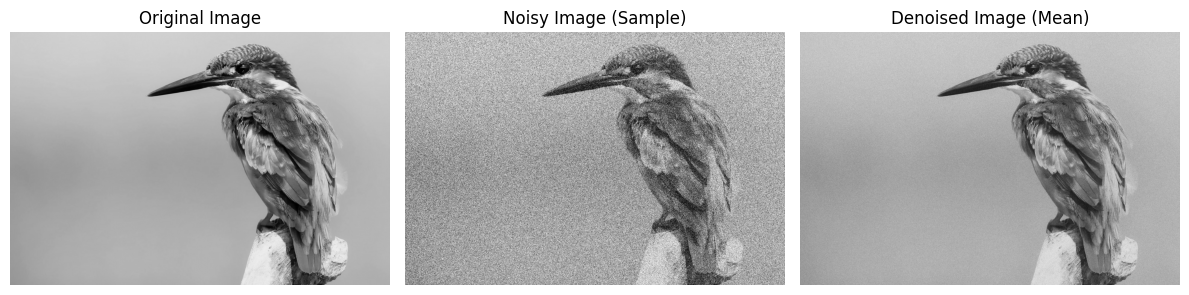

Denoising complete! The expected image is calculated by averaging multiple noisy images.


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = 'test_image.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Add noise to the image
def add_noise_to_image(image, noise_std, num_images):
    noisy_images = []
    for _ in range(num_images):
        noise = np.random.normal(loc=0, scale=noise_std, size=image.shape)
        noisy_image = np.clip(image + noise, 0, 255)  # Ensure pixel values remain valid
        noisy_images.append(noisy_image)
    return np.array(noisy_images)

# Calculate the expected (mean) image
def calculate_expected_image(noisy_images):
    return np.mean(noisy_images, axis=0)

noise_std = 100  # Standard deviation of noise
num_images = 50  # Number of noisy observations

noisy_images = add_noise_to_image(original_image, noise_std, num_images)

expected_image = calculate_expected_image(noisy_images)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy Image (Sample)")
plt.imshow(noisy_images[0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Denoised Image (Mean)")
plt.imshow(expected_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Denoising complete! The expected image is calculated by averaging multiple noisy images.")